# Groundwater response to rainfall
by Leah Montgomery

## Introduction
My project is investigating the relationship between precipitation events and grounwater response. It is important to know the lag time between these two events so that we can better understand the recharge processes. I believe that the lag time between a precipitation event and an increase in head will be different depending on the geology of the aquifer. To accomplish this, I will be collecting data for multiple aqiufers in the United 

## Hypothesis
My hypothesis is that the lag time between precipitation and groundwater respose will be different between aquifers of different materials. 

## Research Area
This is where I will put maps and descriptions of my research areas. The location used for this example is in Warner, NH. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

First I specify the first set of files that I am looking at. I have all of the precipitation data in one subfolder and the depth to water data in another subfolder. My next step is to figure out how to loop through these folders and pull out data for all locations. I have chosen the 2019 water year for the analysis because it had a complete set of data for this station. I think I may try to investigate major rain events for each location and focus on those instead of doing an entire year. In the first part, I attempt to use subfolders to access my data, but I was not able to get the enviornment to work correctly so I cannot yet.

In [16]:
#cwd = os.getcwd()
#subdirectory1 = Path(cwd)/"Precip_data"
#subdirectory2 = Path(cwd)/"dtw_data"
#precip_file = Path(subdirectory1)/'NH_Precip.csv'
#dtw_file = Path(subdirectory2)/'WarnerNH_dtw.txt'
precip_file = 'NH_Precip.csv'
dtw_file = 'WarnerNH_dtw.txt'
start_date = '2018-10-01'
end_date = '2019-09-30'

Next I read in and clean up the data. In this case, I drop unnecessary columns and rename some of them. For the depth to water data, I have found that different locations report their data in different formats. Some use minimum, maximum, and mean daily values while others only report one daily value. For Precipitation data, I am keeping the PRCP column. 

In [17]:
precip = pd.read_csv(precip_file, comment='#', parse_dates=['DATE'], 
                     index_col=['DATE'])
precip = precip[['PRCP']]
precip = precip[pd.to_datetime(start_date):pd.to_datetime(end_date)]

FileNotFoundError: [Errno 2] No such file or directory: 'NH_Precip.csv'

In [12]:
dtw = pd.read_csv(dtw_file, comment='#', header=[1], delimiter='\t',
                       parse_dates=['20d'])
dtw.rename(columns={'20d':'Date'}, inplace=True)
dtw.set_index('Date', inplace=True)
dtw.rename(columns={'14n':'dtw'}, inplace=True)
dtw = dtw[['dtw']]
dtw = dtw[pd.to_datetime(start_date):pd.to_datetime(end_date)]
dtw = dtw.resample('D').mean()

Here I am looking at the raw data on a graph to get an idea of what it looks like. It is common to show the axis inverted with the precip coming from the top of the graph. Since depth to water data is measured as distance from the surface it makes sense to view it inverted like this. 

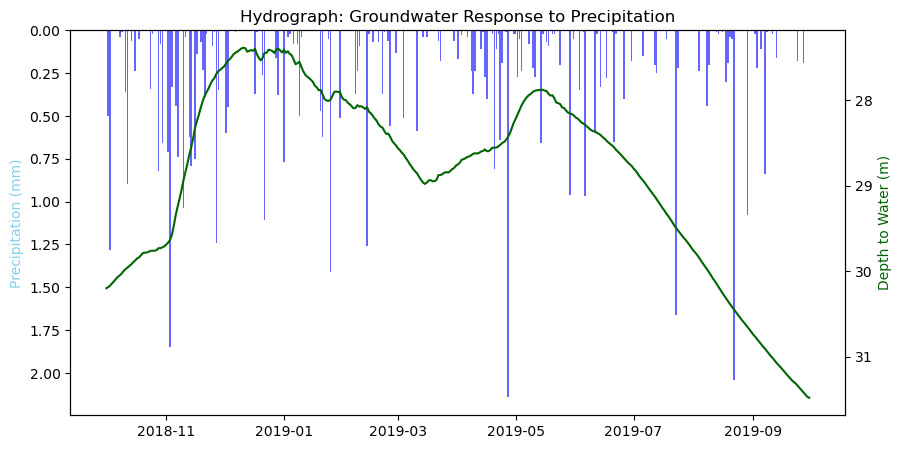

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(precip.index, precip['PRCP'], color='blue', label='Precipitation (mm)', alpha=0.6)
ax1.set_ylabel('Precipitation (mm)', color='skyblue')
ax1.invert_yaxis()  # rainfall plotted downward

ax2 = ax1.twinx()
ax2.plot(dtw.index, dtw['dtw'], color='darkgreen', label='Depth to Water (m)')
ax2.set_ylabel('Depth to Water (m)', color='darkgreen')
ax2.invert_yaxis()  # so rising water level appears upward

plt.title('Hydrograph: Groundwater Response to Precipitation')
plt.show()


Next I calculate the correltation for every lag time between -365 and 365. The results can be seen in a figure below. 

c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


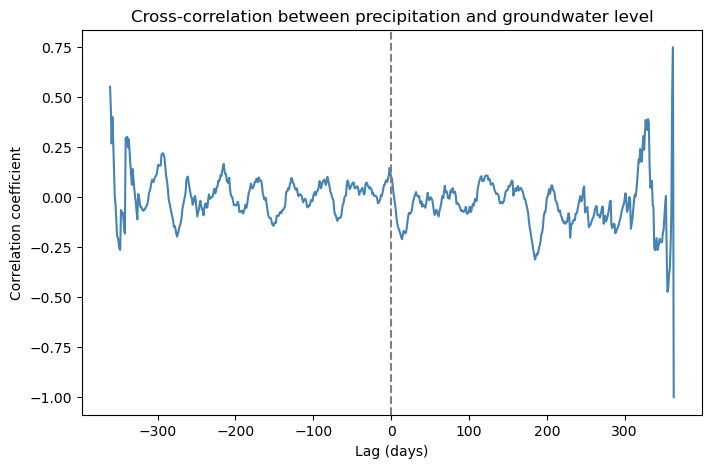

In [15]:
p = precip['PRCP']
dw = dtw['dtw']
dtw_detrended = dw - dw.rolling(30, center=True, min_periods=1).mean()
lags = np.arange(-365, 365)
corrs = [
    p.shift(lag).corr(dtw_detrended)
    for lag in lags
]

plt.figure(figsize=(8,5))
plt.plot(lags, corrs, color='steelblue')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation coefficient')
plt.title('Cross-correlation between precipitation and groundwater level')
plt.show()

## Next steps: 
My next step is to incorporate all of the other locations into one script so that I can compare them all at the same time. Then I will finish my graphs and maps and analyze the data. 

## Discussion 

## Conclusion